# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

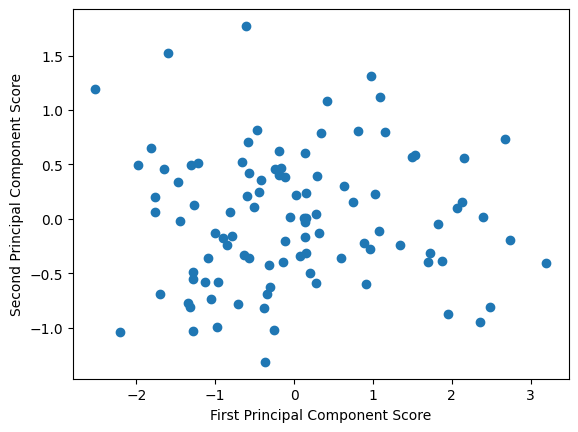

In [880]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The three outliers in the upper left of the PCA plot have low scores for the first principal component (PC1) and high scores for the second (PC2). This suggests their values for series_3 are quite different from the rest of the data, while series_1 and series_2 don't stand out as much. Since series_1 and series_2 are related, it’s tough to pinpoint exactly how they differ based on this plot alone. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [881]:
#Load in vehicle insurance fraud dataset
file_path = '/workspaces/2025-spring-B2/VehicleInsuranceFraud.csv'
df = pd.read_csv(file_path)

df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [882]:
df.describe()


,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [883]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [884]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [885]:
#Heatmap

#Only numeric columns selected
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#Correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,0.025944,-0.007063,0.069420,0.001668,0.025197
PolicyNumber,-0.007797,0.011665,0.025944,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,0.936513,0.009338,-0.001170,-0.013890,1.000000


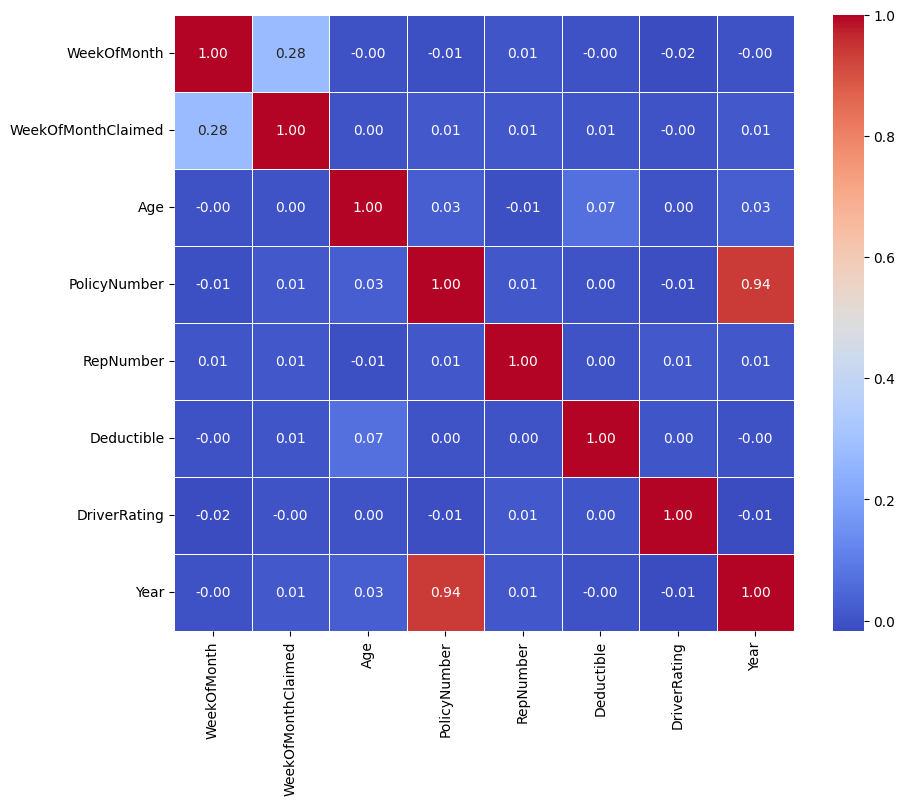

In [886]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

### Notable observations:

PolicyNumber and Year: The correlation is 0.936513, which is a **strong positive correlation**. This indicates that as the PolicyNumber increases, the Year is also likely to increase. This could mean that PolicyNumber is somehow linked to the Year (for example, older policies might have smaller numbers).

Age and Deductible: The correlation is 0.069420, which is **very weak**. This means that there is almost no relationship between Age and Deductible.

WeekOfMonth and WeekOfMonthClaimed: The correlation is 0.275400, indicating a *weak positive* correlation. This means that as the WeekOfMonth increases, there is a slight tendency for the WeekOfMonthClaimed to also increase.

RepNumber and DriverRating: The correlation is 0.003886, which is *extremely weak*, implying that there is almost no relationship between RepNumber and DriverRating.

In [887]:
print(df[['Age', 'Deductible', 'DriverRating']].describe())


                Age    Deductible  DriverRating
count  15420.000000  15420.000000  15420.000000
mean      39.855707    407.704280      2.487808
std       13.492377     43.950998      1.119453
min        0.000000    300.000000      1.000000
25%       31.000000    400.000000      1.000000
50%       38.000000    400.000000      2.000000
75%       48.000000    400.000000      3.000000
max       80.000000    700.000000      4.000000


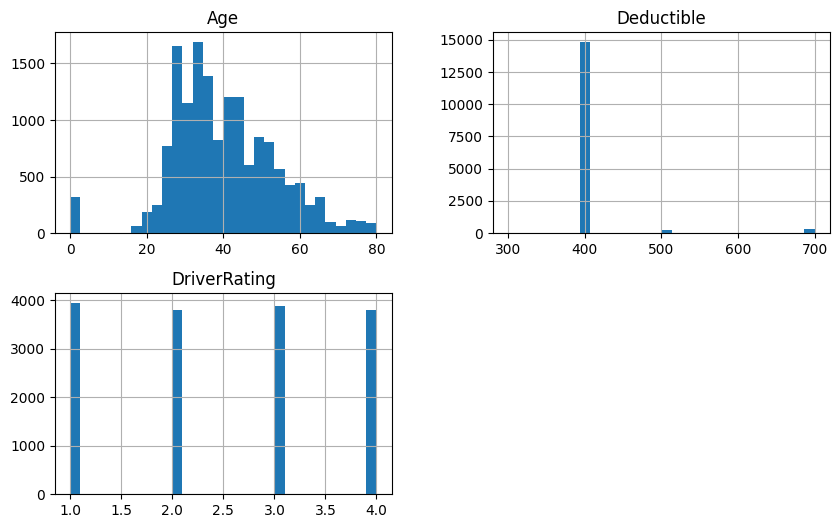

In [888]:
df[['Age', 'Deductible', 'DriverRating']].hist(bins=30, figsize=(10, 6))
plt.show()

In [889]:
print(df['Deductible'].value_counts())


Deductible
400    14838
700      311
500      263
300        8
Name: count, dtype: int64


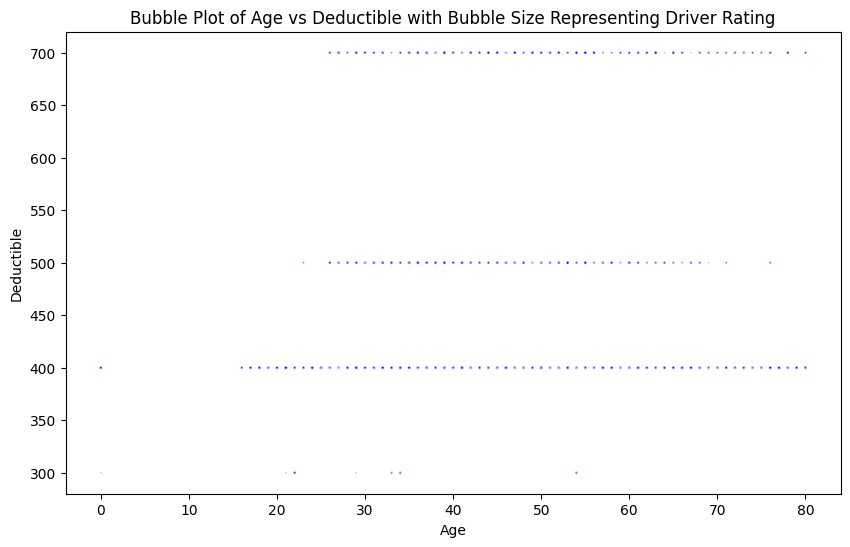

In [890]:
### Bubble Plot

x = df['Age']        
y = df['Deductible']     
size = df['DriverRating'] 

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=size, alpha=0.5, c='blue', edgecolors="w", linewidth=0.5)

plt.xlabel('Age')
plt.ylabel('Deductible')
plt.title('Bubble Plot of Age vs Deductible with Bubble Size Representing Driver Rating')
plt.show()


In [891]:
print(X_train.dtypes)


WeekOfMonth                 int64
WeekOfMonthClaimed          int64
Age                         int64
PolicyNumber                int64
RepNumber                   int64
                            ...  
NumberOfCars_5 to 8          bool
NumberOfCars_more than 8     bool
BasePolicy_Collision         bool
BasePolicy_Liability         bool
FraudFound_Yes               bool
Length: 124, dtype: object


In [892]:
under_16 = df[df['Age'] < 16]
print(under_16)


      Month  WeekOfMonth DayOfWeek   Make AccidentArea DayOfWeekClaimed  \
7       Nov            1    Friday  Honda        Urban          Tuesday   
13      Jan            5    Friday  Honda        Rural        Wednesday   
28      Jul            1  Saturday  Honda        Urban          Tuesday   
31      Mar            1    Sunday  Honda        Urban          Tuesday   
58      May            1    Monday  Honda        Rural        Wednesday   
...     ...          ...       ...    ...          ...              ...   
15243   May            2   Tuesday  Honda        Urban           Monday   
15262   Mar            3    Monday  Honda        Urban         Thursday   
15274   Apr            3    Monday  Honda        Urban          Tuesday   
15379   Jan            2   Tuesday  Honda        Urban         Thursday   
15392   Jan            1  Thursday  Honda        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed   Sex MaritalStatus  ...  \
7              Mar              

In [893]:
print(df[df['Age'] < 16].shape[0])


320


In [894]:
print(df[df['Age'] < 16].describe())


       WeekOfMonth  WeekOfMonthClaimed    Age  PolicyNumber   RepNumber  \
count   320.000000          320.000000  320.0    320.000000  320.000000   
mean      2.668750            2.675000    0.0   6862.315625    8.653125   
std       1.282737            1.221798    0.0   4800.237570    4.600156   
min       1.000000            1.000000    0.0      8.000000    1.000000   
25%       2.000000            2.000000    0.0   2190.500000    5.000000   
50%       3.000000            3.000000    0.0   6772.500000    8.000000   
75%       4.000000            4.000000    0.0  10840.000000   13.000000   
max       5.000000            5.000000    0.0  15393.000000   16.000000   

       Deductible  DriverRating         Year  
count   320.00000    320.000000   320.000000  
mean    399.68750      2.468750  1994.734375  
std       5.59017      1.073604     0.796587  
min     300.00000      1.000000  1994.000000  
25%     400.00000      2.000000  1994.000000  
50%     400.00000      3.000000  1995.0000

In [895]:
df_cleaned = df[df['Age'] >= 16]


In [896]:
#Linear Regression - Predict deductable 

numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])  #only numeric columns

X = numeric_df.drop(columns=['Deductible'])  # Features
y = numeric_df['Deductible']  # Target

#(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initiate
model = LinearRegression()

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

#print the coefficients (how each feature affects the target variable)
print('Coefficients:', model.coef_)

Mean Squared Error: 2056.6838576686496
R² Score: 0.004306541329559543
Coefficients: [-1.26795028e-01  1.11162390e-01  2.26395035e-01  2.75364894e-04
 -7.81434322e-03 -1.14065093e-01 -1.80864951e+00]


The linear regression model has a high Mean Squared Error (2056.68) and a very low R² score (0.0043), indicating poor predictive performance. This suggests that the features used are not strong predictors of the target variable, `Deductible`. The model's results may improve with feature scaling, as linear regression is sensitive to feature scales. Additionally, trying other models like Random Forests or Ridge Regression could provide better results by capturing non-linear relationships and interactions. I plan to explore feature scaling and alternative models to improve performance.

In [897]:
print(df.columns)


Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')


In [898]:
print(df['Fault'].unique())

['Policy Holder' 'Third Party']


In [899]:
#Pontiac has the most "Policy Holder" at fault

at_fault = df[df['Fault'] == 'Policy Holder']
at_fault_counts = at_fault['Make'].value_counts()

print(at_fault_counts.head(1))



Make
Pontiac    2804
Name: count, dtype: int64


In [900]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mse_dict = {}
for target in df.columns:
    if df[target].dtype == 'object' or target == 'FraudFound':
        continue

    X = df.drop(columns=[target])
    X = pd.get_dummies(X, drop_first=True)
    X = X.fillna(X.mean())
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_dict[target] = mse


best_target = min(mse_dict, key=mse_dict.get)
best_mse = mse_dict[best_target]

print(f"The target with the best MSE is '{best_target}' with an MSE of {best_mse:.4f}")


The target with the best MSE is 'Year' with an MSE of 0.0802


In [901]:
df['Year'].unique()


array([1994, 1995, 1996])

In [902]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
num_columns_with_missing_values = columns_with_missing_values.count()

print(f"Number of columns with missing values: {num_columns_with_missing_values}")


Number of columns with missing values: 0


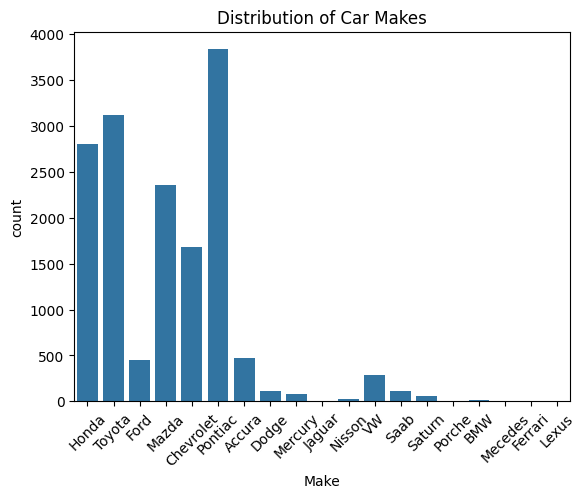

In [903]:
sns.countplot(data=df, x='Make')
plt.title('Distribution of Car Makes')
plt.xticks(rotation=45)
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

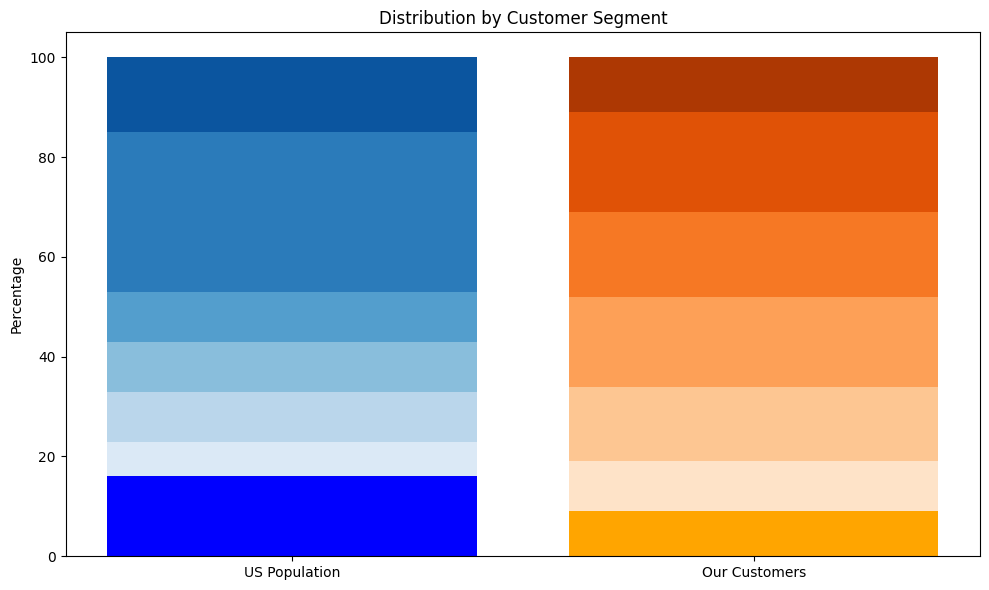

In [904]:
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7']
us_population = [16, 7, 10, 10, 10, 32, 15]
our_customers = [9, 10, 15, 18, 17, 20, 11]

y_values = np.array([us_population, our_customers])

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar('US Population', y_values[0, 0], color='blue')
bottom = y_values[0, 0]
for i in range(1, len(segments)):
    ax.bar('US Population', y_values[0, i], bottom=bottom, color=plt.cm.Blues(i / len(segments)))
    bottom += y_values[0, i]

ax.bar('Our Customers', y_values[1, 0], color='orange')
bottom = y_values[1, 0]
for i in range(1, len(segments)):
    ax.bar('Our Customers', y_values[1, i], bottom=bottom, color=plt.cm.Oranges(i / len(segments)))
    bottom += y_values[1, i]

ax.set_ylabel('Percentage')
ax.set_title('Distribution by Customer Segment')

plt.tight_layout()
plt.show()
